In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date
##https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis for above

%matplotlib inline

In [101]:
## Import the dataset into a Dataframe
df = pd.read_csv('Anxiety_Depression_Dataset.csv')
len(df)

15858

In [102]:
## Visualize all of the columns
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [103]:
### What we need to explore further:
### Phase, Time Period, Time Period Label, Value
df.head(20)

Indicator                       Group  \
0   Symptoms of Depressive Disorder           National Estimate   
1   Symptoms of Depressive Disorder                      By Age   
2   Symptoms of Depressive Disorder                      By Age   
3   Symptoms of Depressive Disorder                      By Age   
4   Symptoms of Depressive Disorder                      By Age   
5   Symptoms of Depressive Disorder                      By Age   
6   Symptoms of Depressive Disorder                      By Age   
7   Symptoms of Depressive Disorder                      By Age   
8   Symptoms of Depressive Disorder                      By Sex   
9   Symptoms of Depressive Disorder                      By Sex   
10  Symptoms of Depressive Disorder  By Race/Hispanic ethnicity   
11  Symptoms of Depressive Disorder  By Race/Hispanic ethnicity   
12  Symptoms of Depressive Disorder  By Race/Hispanic ethnicity   
13  Symptoms of Depressive Disorder  By Race/Hispanic ethnicity   
14  Symptoms of Depressive Disorder  By Race/Hispanic ethnicity   
15  Symptoms of Depressive Disorder                By Education   
16  Symptoms of Depressive Disorder                By Education   
17  Symptoms of Depressive Disorder                By Education   
18  Symptoms of Depressive Disorder                By Education   
19  Symptoms of Depressive Disorder                    By State   

            State                                      Subgroup Phase  \
0   United States                                 United States     1   
1   United States                                 18 - 29 years     1   
2   United States                                 30 - 39 years     1   
3   United States                                 40 - 49 years     1   
4   United States                                 50 - 59 years     1   
5   United States                                 60 - 69 years     1   
6   United States                                 70 - 79 years     1   
7   United States                            80 years and above     1   
8   United States                                          Male     1   
9   United States                                        Female     1   
10  United States                            Hispanic or Latino     1   
11  United States               Non-Hispanic White, single race     1   
12  United States               Non-Hispanic Black, single race     1   
13  United States               Non-Hispanic Asian, single race     1   
14  United States  Non-Hispanic, other races and multiple races     1   
15  United States               Less than a high school diploma     1   
16  United States                    High school diploma or GED     1   
17  United States               Some college/Associate's degree     1   
18  United States                   Bachelor's degree or higher     1   
19        Alabama                                       Alabama     1   

    Time Period     Time Period Label Time Period Start Date  \
0             1  Apr 23 - May 5, 2020             04/23/2020   
1             1  Apr 23 - May 5, 2020             04/23/2020   
2             1  Apr 23 - May 5, 2020             04/23/2020   
3             1  Apr 23 - May 5, 2020             04/23/2020   
4             1  Apr 23 - May 5, 2020             04/23/2020   
5             1  Apr 23 - May 5, 2020             04/23/2020   
6             1  Apr 23 - May 5, 2020             04/23/2020   
7             1  Apr 23 - May 5, 2020             04/23/2020   
8             1  Apr 23 - May 5, 2020             04/23/2020   
9             1  Apr 23 - May 5, 2020             04/23/2020   
10            1  Apr 23 - May 5, 2020             04/23/2020   
11            1  Apr 23 - May 5, 2020             04/23/2020   
12            1  Apr 23 - May 5, 2020             04/23/2020   
13            1  Apr 23 - May 5, 2020             04/23/2020   
14            1  Apr 23 - May 5, 2020             04/23/2020   
15            1  Apr 23 - May 5, 2020             04/23/2020

In [104]:
df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [105]:
### View the number of time unique time periods
len(df['Time Period Label'].unique())

78

In [106]:
df['Value'].max()
df['Value'].min()

4.7

In [107]:
## Checks the columns to see if there are any null values
print(df.isnull().sum())

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      706
Low CI                     706
High CI                    706
Confidence Interval        706
Quartile Range            5453
dtype: int64


In [108]:
## Drop rows that have a null value in the "Value column"
df = df.dropna(subset=['Value'])
print(len(df))

15152


In [109]:
df.head()

Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period     Time Period Label  \
0  United States     1            1  Apr 23 - May 5, 2020   
1  18 - 29 years     1            1  Apr 23 - May 5, 2020   
2  30 - 39 years     1            1  Apr 23 - May 5, 2020   
3  40 - 49 years     1            1  Apr 23 - May 5, 2020   
4  50 - 59 years     1            1  Apr 23 - May 5, 2020   

  Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
0             04/23/2020           05/05/2020   23.5    22.7     24.3   
1             04/23/2020           05/05/2020   32.7    30.2     35.2   
2             04/23/2020           05/05/2020   25.7    24.1     27.3   
3             04/23/2020           05/05/2020   24.8    23.3     26.2   
4             04/23/2020           05/05/2020   23.2    21.5     25.0   

  Confidence Interval Quartile Range  
0         22.7 - 24.3            NaN  
1         30.2 - 35.2            NaN  
2         24.1 - 27.3            NaN  
3         23.3 - 26.2            NaN  
4         21.5 - 25.0            NaN

In [110]:
df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [111]:
## Check dtypes
df.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
dtype: object

In [112]:
## Convert Dates to Datetime format 
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])
df.dtypes

Indicator                         object
Group                             object
State                             object
Subgroup                          object
Phase                             object
Time Period                        int64
Time Period Label                 object
Time Period Start Date    datetime64[ns]
Time Period End Date      datetime64[ns]
Value                            float64
Low CI                           float64
High CI                          float64
Confidence Interval               object
Quartile Range                    object
dtype: object

In [113]:
## Creates a new dataframe that gets the percentage of people who have Symptoms of EITHER Depressive Disorder or Anxiety Disorder, Only have Anxiety Disorder, and Only have Depressive disorder
df_anxiety_and_depression_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
df_anxiety_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder')]
df_depression_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Depressive Disorder')]

In [114]:
## Converts the datetime column "Time Period Start Date" to an ordinal value so linear regression may be run on it
df_anxiety_and_depression_national['Ordinal Date'] = pd.to_datetime(df_anxiety_and_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
df_anxiety_national['Ordinal Date'] = pd.to_datetime(df_anxiety_national['Time Period Start Date']).apply(lambda date: date.toordinal())
df_depression_national['Ordinal Date'] = pd.to_datetime(df_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
##https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis for above
df_anxiety_and_depression_national.head()

C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_29688\574697734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety_and_depression_national['Ordinal Date'] = pd.to_datetime(df_anxiety_and_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_29688\574697734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety_national['Ordinal Date'] = pd.to_datetime(df_anxiety_national['Time Period Start Date'

Indicator              Group  \
140  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   
350  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   
560  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   
770  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   
980  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   

             State       Subgroup Phase  Time Period      Time Period Label  \
140  United States  United States     1            1   Apr 23 - May 5, 2020   
350  United States  United States     1            2   May 7 - May 12, 2020   
560  United States  United States     1            3  May 14 - May 19, 2020   
770  United States  United States     1            4  May 21 - May 26, 2020   
980  United States  United States     1            5  May 28 - June 2, 2020   

    Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
140             2020-04-23           2020-05-05   35.9    35.0     36.8   
350             2020-05-07           2020-05-12   34.4    33.3     35.5   
560             2020-05-14           2020-05-19   33.9    33.1     34.7   
770             2020-05-21           2020-05-26   34.3    33.6     35.1   
980             2020-05-28           2020-06-02   35.5    34.8     36.1   

    Confidence Interval Quartile Range  Ordinal Date  
140         35.0 - 36.8            NaN        737538  
350         33.3 - 35.5            NaN        737552  
560         33.1 - 34.7            NaN        737559  
770         33.6 - 35.1            NaN        737566  
980         34.8 - 36.1            NaN        737573

In [115]:
## Perform linear regression on the all three dataframes
slope_b, yint_b, r_b, p_b, std_err_b = stats.linregress(df_anxiety_and_depression_national['Ordinal Date'], df_anxiety_and_depression_national['Value'])
slope_a, yint_a, r_a, p_a, std_err_a = stats.linregress(df_anxiety_national['Ordinal Date'], df_anxiety_national['Value'])
slope_d, yint_d, r_d, p_d, std_err_d = stats.linregress(df_depression_national['Ordinal Date'], df_depression_national['Value'])
## Calculate the best fit line for all three
best_fit_b = slope_b * df_anxiety_and_depression_national['Ordinal Date'] + yint_b
best_fit_a = slope_a * df_anxiety_national['Ordinal Date'] + yint_a
best_fit_d = slope_d * df_depression_national['Ordinal Date'] + yint_d

In [116]:
df_anxiety_and_depression_national['Time Period Start Date'].min()

Timestamp('2020-04-23 00:00:00')

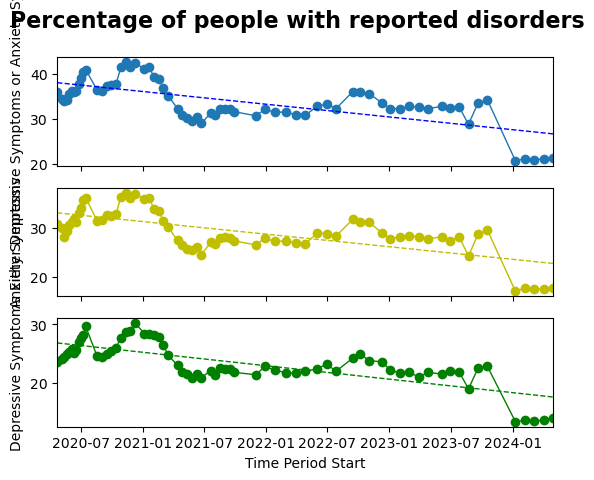

In [117]:
## Perform linear regression
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Percentage of people with reported disorders", fontsize=16, fontweight="bold")

ax1.set_xlim(df_anxiety_and_depression_national['Time Period Start Date'].min(), df_anxiety_and_depression_national['Time Period Start Date'].max())
ax1.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_anxiety_and_depression_national['Value'], linewidth=1, marker="o")
ax1.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_b, "b--", linewidth=1)
ax1.set_ylabel('Either Depressive Symptoms or Anxiety Symptoms')

ax2.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_anxiety_national['Value'], linewidth=1, marker="o", color="y")
ax2.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_a, "y--", linewidth=1)
ax2.set_ylabel('Anxiety Symptoms')

ax3.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_depression_national['Value'], linewidth=1, marker="o", color="g")
ax3.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_d, "g--", linewidth=1)
ax3.set_xlabel("Time Period Start")
ax3.set_ylabel("Depressive Symptoms")

plt.show()

In [118]:
## Create a DataFrame with one hot encoded columns for race
## This encodes the column determining whether or not they were 'Black'
## Filters it down to rows that are grouped by race
df_race = df
df_race = df_race.loc[df_race['Group'] == 'By Race/Hispanic ethnicity']

In [94]:
## Method to one hot encode a feature into a column based on the Subgroup column
def one_hot_encode(col,colName,df):
    df[col] = 0
    df.loc[df['Subgroup'] == colName,col] = 1

In [95]:
df_race.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [96]:
## This encodes the column determining whether or not they were 'White' and single race, 1 if they are and 0 if they are not
one_hot_encode('Black','Non-Hispanic Black, single race',df_race)
one_hot_encode('White','Non-Hispanic White, single race',df_race)
one_hot_encode('Asian','Non-Hispanic Asian, single race',df_race)
one_hot_encode('Hispanic','Hispanic or Latino',df_race)
one_hot_encode('Other','Non-Hispanic, other races and multiple races',df_race)



C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_29688\897484367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_29688\897484367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_29688\897484367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [97]:
df_race = df_race[['Indicator','Group','Subgroup','Time Period Start Date','Time Period End Date','Value','Black','White','Asian','Hispanic','Other']]
df_race

Indicator  \
10                       Symptoms of Depressive Disorder   
11                       Symptoms of Depressive Disorder   
12                       Symptoms of Depressive Disorder   
13                       Symptoms of Depressive Disorder   
14                       Symptoms of Depressive Disorder   
...                                                  ...   
15796  Symptoms of Anxiety Disorder or Depressive Dis...   
15797  Symptoms of Anxiety Disorder or Depressive Dis...   
15798  Symptoms of Anxiety Disorder or Depressive Dis...   
15799  Symptoms of Anxiety Disorder or Depressive Dis...   
15800  Symptoms of Anxiety Disorder or Depressive Dis...   

                            Group  \
10     By Race/Hispanic ethnicity   
11     By Race/Hispanic ethnicity   
12     By Race/Hispanic ethnicity   
13     By Race/Hispanic ethnicity   
14     By Race/Hispanic ethnicity   
...                           ...   
15796  By Race/Hispanic ethnicity   
15797  By Race/Hispanic ethnicity   
15798  By Race/Hispanic ethnicity   
15799  By Race/Hispanic ethnicity   
15800  By Race/Hispanic ethnicity   

                                           Subgroup Time Period Start Date  \
10                               Hispanic or Latino             2020-04-23   
11                  Non-Hispanic White, single race             2020-04-23   
12                  Non-Hispanic Black, single race             2020-04-23   
13                  Non-Hispanic Asian, single race             2020-04-23   
14     Non-Hispanic, other races and multiple races             2020-04-23   
...                                             ...                    ...   
15796                            Hispanic or Latino             2024-04-30   
15797               Non-Hispanic White, single race             2024-04-30   
15798               Non-Hispanic Black, single race             2024-04-30   
15799               Non-Hispanic Asian, single race             2024-04-30   
15800  Non-Hispanic, other races and multiple races             2024-04-30   

      Time Period End Date  Value  Black  White  Asian  Hispanic  Other  
10              2020-05-05   29.4      0      0      0         1      0  
11              2020-05-05   21.4      0      1      0         0      0  
12              2020-05-05   25.6      1      0      0         0      0  
13              2020-05-05   23.6      0      0      1         0      0  
14              2020-05-05   28.3      0      0      0         0      1  
...                    ...    ...    ...    ...    ...       ...    ...  
15796           2024-05-27   23.0      0      0      0         1      0  
15797           2024-05-27   21.0      0      1      0         0      0  
15798           2024-05-27   19.6      1      0      0         0      0  
15799           2024-05-27   14.4      0      0      1         0      0  
15800           2024-05-27   30.8      0      0      0         0      1  

[1020 rows x 11 columns]

In [99]:
df_sex = df
df_sex = df_sex.loc[df_sex['Group'] == 'By Sex']
df_sex['Subgroup'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
one_hot_encode('Male','Male',df_race)
one_hot_encode('Female','Female',df_race)